In [13]:
def remove_unnecessary_lines(file_path, output_path):
    # 필터링 조건 (예: "필요 없는" 이라는 단어를 포함한 문장 제거)
    excluded_phrases = ["(성명)", "(프로그램)", "(제목)","(사업장명)"]
    
    with open('policy_dataset.txt', 'r', encoding='utf-8') as file:
        lines = file.readlines()

    filtered_lines = [
        line for line in lines if not any(phrase in line for phrase in excluded_phrases)
    ]
    # 필터링 결과 저장
    with open(output_path, 'w', encoding='utf-8') as output_file:
        output_file.writelines(filtered_lines)

input_file = 'policy_dataset.txt'
output_file = 'policy_dataset_cleaned.txt'
remove_unnecessary_lines(input_file, output_file)

In [17]:
!pip install nltk wordcloud matplotlib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt



In [42]:
nltk.download('punkt')  # 단어 토큰화
nltk.download('stopwords')  # 불용어 (Stopwords) 사전 다운로드

# 텍스트 데이터
with open('policy_dataset_cleaned.txt', 'r', encoding='utf-8') as line:
        lines = line.readlines()

# 토큰화
tokens = word_tokenize(str(lines))

# 불용어 리스트 파일 불러오기
with open("stopwords-ko.txt", "r", encoding="utf-8") as file:
    korean_stopwords = file.read().splitlines()
    
custom_stopwords = ['통해','수','있는','\\n',"하고",'팀은','되었다',"''",'위한','대한','굴','있었다','많은',
                   '``','대해','이를','위해','중','후',]

total_stopwords = korean_stopwords + custom_stopwords

# 불용어 제거
filtered_tokens = [word for word in tokens if word not in total_stopwords]

# 사용자 정의 한국어 불용어 리스트



# 단어 빈도 계산
word_freq = Counter(filtered_tokens)
    
word_dict= dict(word_freq.most_common(40))
    
# 빈도 출력
print(word_dict)  # 빈도가 높은 단어 출력


{'일경험': 25, '경험을': 23, '프로그램을': 16, '다양한': 15, '프로젝트를': 14, '프로그램은': 14, '새로운': 11, '참여': 11, '프로젝트': 10, '프로그램': 9, '프로그램에': 9, '프로젝트는': 9, '기회를': 9, '통한': 9, '일경험을': 9, '청년들에게': 9, '미래내일': 8, '큰': 8, '청년': 7, '사전': 7, '긍정적인': 7, '역량을': 7, '직접': 7, '취업': 6, '갖고': 6, '팀': 6, '있도록': 6, '서비스': 6, '사업': 6, '총': 6, '진행하는': 6, '프로젝트로': 6, '도자': 6, '목표를': 5, '기술을': 5, '실제': 5, '더': 5, '여러': 5, '도움을': 5, '받아': 5}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


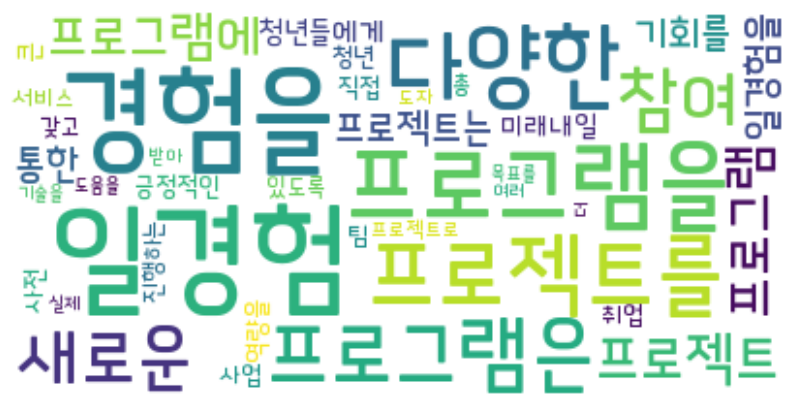

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='Hakgyoansim_Byeoljari.ttf', background_color='white').generate_from_frequencies(word_dict)

# 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
